In [17]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [18]:
#solita inizializzazione
df = load_iris()
Features = pd.DataFrame(df.data, columns=df.feature_names)
Target = pd.DataFrame(df.target, columns=['Species'])
iris = Features.join(Target)
iris = iris.sample(frac=1).reset_index(drop=True)
X = iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X = np.array(X)
one_hot_encoder = OneHotEncoder(sparse=False)
Y = iris.Species   #lavoro coi vettori
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [19]:
def ffnn(X_train, Y_train, iterazione, nodi, learning_rate): #non ho messo la lunghezza ma me la ricavo sotto
    #ho messo X_train, Y_train e iterazione perchè ritengo sia più completa così la funzione, questi parametri potevano essere presi da fuori (dalla cella sopra e da quella in cui ffnn viene chiamata),
    #però se il testo fosse diverso così posso far lavorare completamente da sola la funzione, ad esempio nella situazione in cui ricevo una dataset da splittato
    hidden_livelli = len(nodi) - 1 #lunghezza hidden layers   
    livelli, pesi = len(nodi), [] #lunghezza tutti i livelli, pesi li metto in una lista perchè ho le varie combinazioni
    #inizializzo valori dei pesi a un numero random tra -1 e 1
    for i in range(1, livelli): #inizializzazione come in linear e logistic
        peso_iniz= [[np.random.uniform(-1, 1) for k in range(nodi[i-1] + 1)] for j in range(nodi[i])] 
        pesi.append(np.matrix(peso_iniz))

    for iter in range(1, iterazione+1): #per permettere giù la stampa fatta bene
        #back and forward propagation
        livelli = len(pesi)
        for i in range(len(X_train)):
          x, y = X_train[i], Y_train[i]
          x = np.matrix(np.append(1, x)) #aumento vettore della funzione, per spazio di lavoro
          contributo = ForwardPropagation(x, pesi, livelli)
          pesi = BackPropagation(y, contributo, pesi, livelli, learning_rate) #all'ultimo giro del ciclo avremo poi i pesi finali
        #stampa
        if(iter % 100 == 0):
            print("iterazione numero: {}".format(iter))
            a=Accuracy(X_train, Y_train, pesi)
            print("Accuracy:{}".format(a))
            accuracy.append(a)
            print()

In [20]:
def ForwardPropagation(x, pesi, livelli): #ho strutturato meglio back e forward, visto che non ho solo due livelli e devono quindi adattarsi al numero di layer
    lista_contributo = [x]
    livello_input = x         
    for j in range(livelli):
        contributo = Sigmoid(np.dot(livello_input, pesi[j].T)) #solita sigmoid
        lista_contributo.append(contributo)
        livello_input = np.append(1, contributo) #aumento bias
    return lista_contributo

def BackPropagation(y, lista_contributo, pesi, livelli, learning_rate): #ha come input quello che fa la forward
    out = lista_contributo[-1]
    errore=y - out
    errore = np.matrix(errore) # Errore dall'output #uso sigmoid  #lo mappo in matrice, non posso quindi graficarlo; faccio il grafico dell'accuracy quindi
    for j in range(livelli, 0, -1):
        contributo_corrente = lista_contributo[j]       
        if(j > 1):
            #aumento bias
            contributo_prima = np.append(1, lista_contributo[j-1])
        else:
            # sono nel primo livello hidden, quindi niente bias
            contributo_prima = lista_contributo[0]
        
        delta = np.multiply(errore, SigmoidDerivative(contributo_corrente)) 
        pesi[j-1] += learning_rate * np.multiply(delta.T, contributo_prima)

        w = np.delete(pesi[j-1], [0], axis=1) # tolgo il bias che ho aggiunto per i calcoli
        errore = np.dot(delta, w) # errore per questo layer
    return pesi

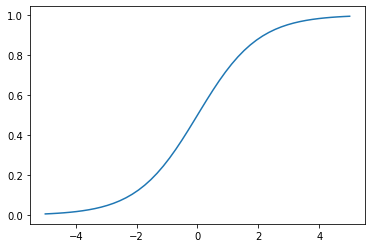

In [21]:
#solito
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))
def SigmoidDerivative(x):
    return np.multiply(x, 1-x)
    
a = np.linspace( -5, 5, 50 )  #presentazione funzione sigmoid, che usiamo nella SGD
b = 1 / ( 1 + np.exp( -a ) )  
plt.plot( a, b )   

In [22]:
def Predict(feature, pesi):    #preso da homework precedenti, poi ho aggiunto la forward e ho sistemato
    livelli = len(pesi)
    feature = np.append(1, feature) #aumento vettore feature
    lista_contributo = ForwardPropagation(feature, pesi, livelli)  
    output = lista_contributo[-1].A1
    m, val = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, val = output[i], i
    #vettore che predice a zero
    y = [0 for i in range(len(output))]
    y[val] = 1 #ci lavoro e lo ritorno
    return y 

def Accuracy(X, Y, pesi):
    sol = 0
    for i in range(len(X)):
        xx, yy = X[i], list(Y[i])
        guess = Predict(xx, pesi)
        if(yy == guess): #se giusto fai +1
            sol += 1
    return sol / len(X)

In [23]:
input = len(X[0]) # Numero features -> 4
output = len(Y[0]) # Numero specie diverse -> 3

livelli = [input, 10, 20, 10, output] # Numero dei layers, stavolta ne puoi mettere quanti ne vuoi 
learning_rate, iterazioni = 0.01, 1000 # Si può scegliere sia num. iterazioni sia num. learning rate
accuracy=[]
ffnn(X_train, Y_train, iterazioni, livelli, learning_rate) #il problema alla fine è stato trasfomare e lavorare coi vettori, praticamente generalizzare il concetto.
                                                          #Concettualmente è lo stesso esercizio dei due livelli, ho printato accuracy e non errore perchè stavolta salvo
                                                          #l'errore in matrice e plt non mi fa stampare una dimensione maggiore di 2D.

iterazione numero: 100
Accuracy:0.7401574803149606

iterazione numero: 200
Accuracy:0.968503937007874

iterazione numero: 300
Accuracy:0.9763779527559056

iterazione numero: 400
Accuracy:0.984251968503937

iterazione numero: 500
Accuracy:0.9921259842519685

iterazione numero: 600
Accuracy:0.9921259842519685

iterazione numero: 700
Accuracy:0.9921259842519685

iterazione numero: 800
Accuracy:0.9921259842519685

iterazione numero: 900
Accuracy:0.9921259842519685

iterazione numero: 1000
Accuracy:0.9921259842519685



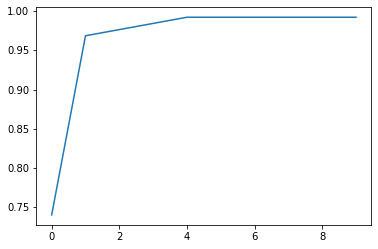

In [24]:
plt.plot(accuracy) #grafico accuracy è sensato, in generale la ffnn migliora sempre fino ad arrivare ad un suo limite